# Assessment1: Mercedes-Benz Greener Manufacturing 
## Description: Reduce the time a Mercedes-Benz spends on the test bench.

In [1]:
# import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
%matplotlib inline

In [2]:
# Import train dataset
train_df = pd.read_csv('train.csv')
train_df.head()

ID       y  X0 X1  X2 X3 X4 X5 X6 X8  ...  X375  X376  X377  X378  X379  \
0   0  130.81   k  v  at  a  d  u  j  o  ...     0     0     1     0     0   
1   6   88.53   k  t  av  e  d  y  l  o  ...     1     0     0     0     0   
2   7   76.26  az  w   n  c  d  x  j  x  ...     0     0     0     0     0   
3   9   80.62  az  t   n  f  d  x  l  e  ...     0     0     0     0     0   
4  13   78.02  az  v   n  f  d  h  d  n  ...     0     0     0     0     0   

   X380  X382  X383  X384  X385  
0     0     0     0     0     0  
1     0     0     0     0     0  
2     0     1     0     0     0  
3     0     0     0     0     0  
4     0     0     0     0     0  

[5 rows x 378 columns]

In [3]:
# Check the shape of dataframe
train_df.shape

(4209, 378)

There are 4209 rows and 378 columns in the dataframe and target feature 'y' is the time that cars spend on the test bench

In [4]:
train_df.describe()

ID            y          X10     X11          X12  \
count  4209.000000  4209.000000  4209.000000  4209.0  4209.000000   
mean   4205.960798   100.669318     0.013305     0.0     0.075077   
std    2437.608688    12.679381     0.114590     0.0     0.263547   
min       0.000000    72.110000     0.000000     0.0     0.000000   
25%    2095.000000    90.820000     0.000000     0.0     0.000000   
50%    4220.000000    99.150000     0.000000     0.0     0.000000   
75%    6314.000000   109.010000     0.000000     0.0     0.000000   
max    8417.000000   265.320000     1.000000     0.0     1.000000   

               X13          X14          X15          X16          X17  ...  \
count  4209.000000  4209.000000  4209.000000  4209.000000  4209.000000  ...   
mean      0.057971     0.428130     0.000475     0.002613     0.007603  ...   
std       0.233716     0.494867     0.021796     0.051061     0.086872  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
50%       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
75%       0.000000     1.000000     0.000000     0.000000     0.000000  ...   
max       1.000000     1.000000     1.000000     1.000000     1.000000  ...   

              X375         X376         X377         X378         X379  \
count  4209.000000  4209.000000  4209.000000  4209.000000  4209.000000   
mean      0.318841     0.057258     0.314802     0.020670     0.009503   
std       0.466082     0.232363     0.464492     0.142294     0.097033   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       1.000000     0.000000     1.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

              X380         X382         X383         X384         X385  
count  4209.000000  4209.000000  4209.000000  4209.000000  4209.000000  
mean      0.008078     0.007603     0.001663     0.000475     0.001426  
std       0.089524     0.086872     0.040752     0.021796     0.037734  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000     0.000000     0.000000  
50%       0.000000     0.000000     0.000000     0.000000     0.000000  
75%       0.000000     0.000000     0.000000     0.000000     0.000000  
max       1.000000     1.000000     1.000000     1.000000     1.000000  

[8 rows x 370 columns]

### Task 1: Remove the features with zero variance from datasets

In [5]:
# Calculate the varaince of all the features and store them to a new object
train_df_var = pd.DataFrame(train_df.var(axis = 0),columns = ['Variance'])
train_df_var

Variance
ID    5.941936e+06
y     1.607667e+02
X10   1.313092e-02
X11   0.000000e+00
X12   6.945713e-02
...            ...
X380  8.014579e-03
X382  7.546747e-03
X383  1.660732e-03
X384  4.750593e-04
X385  1.423823e-03

[370 rows x 1 columns]

In [6]:
#Find the features with zero variance
train_df_var[train_df_var.Variance == 0]

Variance
X11        0.0
X93        0.0
X107       0.0
X233       0.0
X235       0.0
X268       0.0
X289       0.0
X290       0.0
X293       0.0
X297       0.0
X330       0.0
X347       0.0

The features X11, X93, X107, X233, X235, X268, X289, X290, X293, X297, X330, X347 has zero variance

In [7]:
# Drop the features with zero variance from train dataset
train_df_modified = train_df.drop(columns = train_df_var[train_df_var.Variance == 0].index)

In [8]:
train_df_modified.head()

ID       y  X0 X1  X2 X3 X4 X5 X6 X8  ...  X375  X376  X377  X378  X379  \
0   0  130.81   k  v  at  a  d  u  j  o  ...     0     0     1     0     0   
1   6   88.53   k  t  av  e  d  y  l  o  ...     1     0     0     0     0   
2   7   76.26  az  w   n  c  d  x  j  x  ...     0     0     0     0     0   
3   9   80.62  az  t   n  f  d  x  l  e  ...     0     0     0     0     0   
4  13   78.02  az  v   n  f  d  h  d  n  ...     0     0     0     0     0   

   X380  X382  X383  X384  X385  
0     0     0     0     0     0  
1     0     0     0     0     0  
2     0     1     0     0     0  
3     0     0     0     0     0  
4     0     0     0     0     0  

[5 rows x 366 columns]

In [9]:
# print the shape of train_df and train_df_modified to confirm if the features were removed 
print('Shape of original dataset (train_df):', train_df.shape)
print('Shape of modified dataset (train_df_modified):', train_df_modified.shape)

Shape of original dataset (train_df): (4209, 378)
Shape of modified dataset (train_df_modified): (4209, 366)


It is confirmed that there are 22 features with zero variance and were removed

In [10]:
# Save the modified train dataset
train_df_modified.to_csv('train_df_modified.csv', index = False)

#### Remove the zero variance features from the test dataset

In [11]:
test_df = pd.read_csv('test.csv')
test_df.head()

ID  X0 X1  X2 X3 X4 X5 X6 X8  X10  ...  X375  X376  X377  X378  X379  X380  \
0   1  az  v   n  f  d  t  a  w    0  ...     0     0     0     1     0     0   
1   2   t  b  ai  a  d  b  g  y    0  ...     0     0     1     0     0     0   
2   3  az  v  as  f  d  a  j  j    0  ...     0     0     0     1     0     0   
3   4  az  l   n  f  d  z  l  n    0  ...     0     0     0     1     0     0   
4   5   w  s  as  c  d  y  i  m    0  ...     1     0     0     0     0     0   

   X382  X383  X384  X385  
0     0     0     0     0  
1     0     0     0     0  
2     0     0     0     0  
3     0     0     0     0  
4     0     0     0     0  

[5 rows x 377 columns]

In [12]:
test_df.shape

(4209, 377)

There are 4209 data points and 377 features in the dataset

In [13]:
test_df.describe()

ID          X10          X11          X12          X13  \
count  4209.000000  4209.000000  4209.000000  4209.000000  4209.000000   
mean   4211.039202     0.019007     0.000238     0.074364     0.061060   
std    2423.078926     0.136565     0.015414     0.262394     0.239468   
min       1.000000     0.000000     0.000000     0.000000     0.000000   
25%    2115.000000     0.000000     0.000000     0.000000     0.000000   
50%    4202.000000     0.000000     0.000000     0.000000     0.000000   
75%    6310.000000     0.000000     0.000000     0.000000     0.000000   
max    8416.000000     1.000000     1.000000     1.000000     1.000000   

               X14          X15          X16          X17          X18  ...  \
count  4209.000000  4209.000000  4209.000000  4209.000000  4209.000000  ...   
mean      0.427893     0.000713     0.002613     0.008791     0.010216  ...   
std       0.494832     0.026691     0.051061     0.093357     0.100570  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
50%       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
75%       1.000000     0.000000     0.000000     0.000000     0.000000  ...   
max       1.000000     1.000000     1.000000     1.000000     1.000000  ...   

              X375         X376         X377         X378         X379  \
count  4209.000000  4209.000000  4209.000000  4209.000000  4209.000000   
mean      0.325968     0.049656     0.311951     0.019244     0.011879   
std       0.468791     0.217258     0.463345     0.137399     0.108356   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       1.000000     0.000000     1.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

              X380         X382         X383         X384         X385  
count  4209.000000  4209.000000  4209.000000  4209.000000  4209.000000  
mean      0.008078     0.008791     0.000475     0.000713     0.001663  
std       0.089524     0.093357     0.021796     0.026691     0.040752  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000     0.000000     0.000000  
50%       0.000000     0.000000     0.000000     0.000000     0.000000  
75%       0.000000     0.000000     0.000000     0.000000     0.000000  
max       1.000000     1.000000     1.000000     1.000000     1.000000  

[8 rows x 369 columns]

In [14]:
# As the test dataset is not considered for training and only used for testing, we can remove the same features of train dataset in the test dataset as well
test_df_modified = test_df.drop(columns=['X11', 'X93', 'X107','X233', 'X235', 'X268', 'X289', 'X290', 'X293','X297','X330','X347'])

In [15]:
test_df_modified.head()

ID  X0 X1  X2 X3 X4 X5 X6 X8  X10  ...  X375  X376  X377  X378  X379  X380  \
0   1  az  v   n  f  d  t  a  w    0  ...     0     0     0     1     0     0   
1   2   t  b  ai  a  d  b  g  y    0  ...     0     0     1     0     0     0   
2   3  az  v  as  f  d  a  j  j    0  ...     0     0     0     1     0     0   
3   4  az  l   n  f  d  z  l  n    0  ...     0     0     0     1     0     0   
4   5   w  s  as  c  d  y  i  m    0  ...     1     0     0     0     0     0   

   X382  X383  X384  X385  
0     0     0     0     0  
1     0     0     0     0  
2     0     0     0     0  
3     0     0     0     0  
4     0     0     0     0  

[5 rows x 365 columns]

In [16]:
# print the shape of test_df and test_df_modified to confirm if the features were removed 
print('Shape of original dataset (test_df):', test_df.shape)
print('Shape of modified dataset (test_df_modified):', test_df_modified.shape)

Shape of original dataset (test_df): (4209, 377)
Shape of modified dataset (test_df_modified): (4209, 365)


It is confiremd that all the features with zero varinace are removed from dataset

In [17]:
# Save the modified test dataset
test_df_modified.to_csv('test_df_modified.csv', index = False)

### Task 2: Check for null and unique values for test and train sets.

In [18]:
# Check if there are any null values in the train dataset
train_df_modified.isnull().any().sum()

0

In [19]:
# Check if there are any null values in the train dataset
test_df_modified.isnull().any().sum()

0

There are no null values from train and test dataset

In [20]:
# Check the unique values in the train dataset
train_df_modified_uniq = pd.DataFrame(train_df_modified.nunique(),columns=['Unique_Values'])
train_df_modified_uniq

Unique_Values
ID             4209
y              2545
X0               47
X1               27
X2               44
...             ...
X380              2
X382              2
X383              2
X384              2
X385              2

[366 rows x 1 columns]

Observations:
1. All the values in 'ID' are unique and this feature must be ignored as it will not make any sense to the prediction
2. 'y' is the target feature
3. features X0,X1,X2,X3,X4,X5,X6 and X8 are the categorical features which must be converted to numerical values/onehot encoded values
4. All features after X8 are having binary values

In [21]:
# Check the unique values in the test dataset
test_df_modified_uniq = pd.DataFrame(test_df_modified.nunique(),columns=['Unique_Values'])
test_df_modified_uniq

Unique_Values
ID             4209
X0               49
X1               27
X2               45
X3                7
...             ...
X380              2
X382              2
X383              2
X384              2
X385              2

[365 rows x 1 columns]

Observations:
1. All the values in 'ID' are unique and this feature must be ignored as it will not make any sense to the prediction
2. features X0,X1,X2,X3,X4,X5,X6 and X8 are the categorical features which must be converted to numerical values/onehot encoded values
3. All features after X8 are having binary values

### Task3: Apply label encoder

#### Applying Label encoder/one hot encoder for train dataset

In [22]:
#Before applying label encoder, remove the features 'ID' and 'y' from the train dataset and store it to a new object
train_df_without_ID_y = train_df_modified.drop(columns = ['ID','y'])
train_df_without_ID_y.shape

(4209, 364)

In [23]:
train_df_without_ID_y.nunique()

X0      47
X1      27
X2      44
X3       7
X4       4
        ..
X380     2
X382     2
X383     2
X384     2
X385     2
Length: 364, dtype: int64

It is observed that the categorical features has 4 or more different categories. 
Applying label encoder will replace all the catetories with same number of unique values and will impact the accuracy level.
Inorder to fix this, 
* we'll identify the top 10 most frequent categories from each feature and perform one hot encoding for them
* All Top 10 most frequent categories will be considered as '1' and all the remaining categories will be considered as '0' in each feature.
* This will ensure only binary values are present in all the features

In [24]:
# Identify the top 10 most frequent categories of features X0,X1,X2,X3,X4,X5,X6,X8 and store them in seperate lists

#X0
top_10_X0 = train_df_modified.X0.value_counts().sort_values(ascending=False).head(10).index
top_10_X0

Index(['z', 'ak', 'y', 'ay', 't', 'x', 'o', 'f', 'n', 'w'], dtype='object')

In [25]:
# Define a funtion to peform one hot encoding for the top 10 most frequent categories of features
def one_hot_top10(df,feature,top10_categories):
    for category in top10_categories:
        df[feature+'_'+category]=np.where(train_df_modified[feature]==category,1,0)

In [26]:
one_hot_top10(train_df_modified,'X0',top_10_X0)

In [27]:
train_df_modified.head()

ID       y  X0 X1  X2 X3 X4 X5 X6 X8  ...  X0_z  X0_ak  X0_y  X0_ay  X0_t  \
0   0  130.81   k  v  at  a  d  u  j  o  ...     0      0     0      0     0   
1   6   88.53   k  t  av  e  d  y  l  o  ...     0      0     0      0     0   
2   7   76.26  az  w   n  c  d  x  j  x  ...     0      0     0      0     0   
3   9   80.62  az  t   n  f  d  x  l  e  ...     0      0     0      0     0   
4  13   78.02  az  v   n  f  d  h  d  n  ...     0      0     0      0     0   

   X0_x  X0_o  X0_f  X0_n  X0_w  
0     0     0     0     0     0  
1     0     0     0     0     0  
2     0     0     0     0     0  
3     0     0     0     0     0  
4     0     0     0     0     0  

[5 rows x 376 columns]

In [28]:
# verify for one feature if it contains only binary value
train_df_modified.X0_z.unique()

array([0, 1])

The above table shows 10 new feature are created with binary values for the top 10 most frequent categories of X0
We'll perform one hot encoding for remaining features

In [29]:
# X1 
top_10_X1 = train_df_modified.X1.value_counts().sort_values(ascending=False).head(10).index
top_10_X1

Index(['aa', 's', 'b', 'l', 'v', 'r', 'i', 'a', 'c', 'o'], dtype='object')

In [30]:
one_hot_top10(train_df_modified,'X1',top_10_X1)
train_df_modified.head(2)

ID       y X0 X1  X2 X3 X4 X5 X6 X8  ...  X1_aa  X1_s  X1_b  X1_l  X1_v  \
0   0  130.81  k  v  at  a  d  u  j  o  ...      0     0     0     0     1   
1   6   88.53  k  t  av  e  d  y  l  o  ...      0     0     0     0     0   

   X1_r  X1_i  X1_a  X1_c  X1_o  
0     0     0     0     0     0  
1     0     0     0     0     0  

[2 rows x 386 columns]

In [31]:
# X2 
top_10_X2 = train_df_modified.X2.value_counts().sort_values(ascending=False).head(10).index
top_10_X2

Index(['as', 'ae', 'ai', 'm', 'ak', 'r', 'n', 's', 'f', 'e'], dtype='object')

In [32]:
one_hot_top10(train_df_modified,'X2',top_10_X2)
train_df_modified.head(2)

ID       y X0 X1  X2 X3 X4 X5 X6 X8  ...  X2_as  X2_ae  X2_ai  X2_m  X2_ak  \
0   0  130.81  k  v  at  a  d  u  j  o  ...      0      0      0     0      0   
1   6   88.53  k  t  av  e  d  y  l  o  ...      0      0      0     0      0   

   X2_r  X2_n  X2_s  X2_f  X2_e  
0     0     0     0     0     0  
1     0     0     0     0     0  

[2 rows x 396 columns]

In [33]:
# X3
top_10_X3 = train_df_modified.X3.value_counts().sort_values(ascending=False).head(10).index
top_10_X3

Index(['c', 'f', 'a', 'd', 'g', 'e', 'b'], dtype='object')

In [34]:
one_hot_top10(train_df_modified,'X3',top_10_X3)
train_df_modified.head(2)

ID       y X0 X1  X2 X3 X4 X5 X6 X8  ...  X2_s  X2_f  X2_e  X3_c  X3_f  \
0   0  130.81  k  v  at  a  d  u  j  o  ...     0     0     0     0     0   
1   6   88.53  k  t  av  e  d  y  l  o  ...     0     0     0     0     0   

   X3_a  X3_d  X3_g  X3_e  X3_b  
0     1     0     0     0     0  
1     0     0     0     1     0  

[2 rows x 403 columns]

In [35]:
# X4
top_10_X4 = train_df_modified.X4.value_counts().sort_values(ascending=False).head(10).index
top_10_X4

Index(['d', 'a', 'b', 'c'], dtype='object')

In [36]:
one_hot_top10(train_df_modified,'X4',top_10_X4)
train_df_modified.head(2)

ID       y X0 X1  X2 X3 X4 X5 X6 X8  ...  X3_f  X3_a  X3_d  X3_g  X3_e  \
0   0  130.81  k  v  at  a  d  u  j  o  ...     0     1     0     0     0   
1   6   88.53  k  t  av  e  d  y  l  o  ...     0     0     0     0     1   

   X3_b  X4_d  X4_a  X4_b  X4_c  
0     0     1     0     0     0  
1     0     1     0     0     0  

[2 rows x 407 columns]

In [37]:
# X5
top_10_X5 = train_df_modified.X5.value_counts().sort_values(ascending=False).head(10).index
top_10_X5

Index(['w', 'v', 'q', 'r', 'd', 's', 'n', 'm', 'p', 'i'], dtype='object')

In [38]:
one_hot_top10(train_df_modified,'X5',top_10_X5)
train_df_modified.head(2)

ID       y X0 X1  X2 X3 X4 X5 X6 X8  ...  X5_w  X5_v  X5_q  X5_r  X5_d  \
0   0  130.81  k  v  at  a  d  u  j  o  ...     0     0     0     0     0   
1   6   88.53  k  t  av  e  d  y  l  o  ...     0     0     0     0     0   

   X5_s  X5_n  X5_m  X5_p  X5_i  
0     0     0     0     0     0  
1     0     0     0     0     0  

[2 rows x 417 columns]

In [39]:
# X6
top_10_X6 = train_df_modified.X6.value_counts().sort_values(ascending=False).head(10).index
top_10_X6

Index(['g', 'j', 'd', 'i', 'l', 'a', 'h', 'k', 'c', 'b'], dtype='object')

In [40]:
one_hot_top10(train_df_modified,'X6',top_10_X6)
train_df_modified.head(2)

ID       y X0 X1  X2 X3 X4 X5 X6 X8  ...  X6_g  X6_j  X6_d  X6_i  X6_l  \
0   0  130.81  k  v  at  a  d  u  j  o  ...     0     1     0     0     0   
1   6   88.53  k  t  av  e  d  y  l  o  ...     0     0     0     0     1   

   X6_a  X6_h  X6_k  X6_c  X6_b  
0     0     0     0     0     0  
1     0     0     0     0     0  

[2 rows x 427 columns]

In [41]:
# X8
top_10_X8 = train_df_modified.X8.value_counts().sort_values(ascending=False).head(10).index
top_10_X8

Index(['j', 's', 'f', 'n', 'i', 'e', 'r', 'a', 'w', 'v'], dtype='object')

In [42]:
one_hot_top10(train_df_modified,'X8',top_10_X8)
train_df_modified.head(2)

ID       y X0 X1  X2 X3 X4 X5 X6 X8  ...  X8_j  X8_s  X8_f  X8_n  X8_i  \
0   0  130.81  k  v  at  a  d  u  j  o  ...     0     0     0     0     0   
1   6   88.53  k  t  av  e  d  y  l  o  ...     0     0     0     0     0   

   X8_e  X8_r  X8_a  X8_w  X8_v  
0     0     0     0     0     0  
1     0     0     0     0     0  

[2 rows x 437 columns]

#### label encoder/one hot encoding is successfully applied to the train dataset

In [43]:
# Drop the features which are not required after applying onehot encoding and store the dataset train_df_modified to new object 
train_df_modified_OHE = train_df_modified.drop(columns=['X0','X1','X2','X3','X4','X5','X6','X8'])
train_df_modified_OHE.to_csv('train_df_modified_OHE.csv',index=False)

In [44]:
train_df_modified_OHE.shape

(4209, 429)

#### #####label encoder/one hot encoding is successfully applied to the train dataset#####

#### Applying Label encoder/one hot encoder for test dataset

In [45]:
# X0
top_10_test_X0 = test_df_modified.X0.value_counts().sort_values(ascending=False).head(10).index
top_10_test_X0

Index(['ak', 'y', 'z', 'x', 'ay', 't', 'o', 'f', 'w', 'j'], dtype='object')

In [46]:
one_hot_top10(test_df_modified,'X0',top_10_test_X0)
test_df_modified.head(2)

ID  X0 X1  X2 X3 X4 X5 X6 X8  X10  ...  X0_ak  X0_y  X0_z  X0_x  X0_ay  \
0   1  az  v   n  f  d  t  a  w    0  ...      0     0     0     0      0   
1   2   t  b  ai  a  d  b  g  y    0  ...      0     0     0     0      0   

   X0_t  X0_o  X0_f  X0_w  X0_j  
0     0     0     0     0     0  
1     0     0     0     0     0  

[2 rows x 375 columns]

In [47]:
# X1
top_10_test_X1 = test_df_modified.X1.value_counts().sort_values(ascending=False).head(10).index
top_10_test_X1

Index(['aa', 's', 'l', 'b', 'v', 'r', 'i', 'a', 'c', 'o'], dtype='object')

In [48]:
one_hot_top10(test_df_modified,'X1',top_10_test_X1)
test_df_modified.head(2)

ID  X0 X1  X2 X3 X4 X5 X6 X8  X10  ...  X1_aa  X1_s  X1_l  X1_b  X1_v  \
0   1  az  v   n  f  d  t  a  w    0  ...      0     0     0     0     1   
1   2   t  b  ai  a  d  b  g  y    0  ...      0     0     0     0     0   

   X1_r  X1_i  X1_a  X1_c  X1_o  
0     0     0     0     0     0  
1     0     0     0     0     0  

[2 rows x 385 columns]

In [49]:
# X2
top_10_test_X2 = test_df_modified.X2.value_counts().sort_values(ascending=False).head(10).index
top_10_test_X2

Index(['as', 'ae', 'ai', 'm', 'ak', 'r', 'n', 's', 'f', 'e'], dtype='object')

In [50]:
one_hot_top10(test_df_modified,'X2',top_10_test_X2)
test_df_modified.head(2)

ID  X0 X1  X2 X3 X4 X5 X6 X8  X10  ...  X2_as  X2_ae  X2_ai  X2_m  X2_ak  \
0   1  az  v   n  f  d  t  a  w    0  ...      0      0      0     0      0   
1   2   t  b  ai  a  d  b  g  y    0  ...      0      0      0     0      0   

   X2_r  X2_n  X2_s  X2_f  X2_e  
0     0     0     0     0     0  
1     0     0     0     0     0  

[2 rows x 395 columns]

In [51]:
# X3
top_10_test_X3 = test_df_modified.X3.value_counts().sort_values(ascending=False).head(10).index
top_10_test_X3

Index(['c', 'f', 'a', 'd', 'g', 'e', 'b'], dtype='object')

In [52]:
one_hot_top10(test_df_modified,'X3',top_10_test_X3)
test_df_modified.head(2)

ID  X0 X1  X2 X3 X4 X5 X6 X8  X10  ...  X2_s  X2_f  X2_e  X3_c  X3_f  X3_a  \
0   1  az  v   n  f  d  t  a  w    0  ...     0     0     0     0     0     1   
1   2   t  b  ai  a  d  b  g  y    0  ...     0     0     0     0     0     0   

   X3_d  X3_g  X3_e  X3_b  
0     0     0     0     0  
1     0     0     1     0  

[2 rows x 402 columns]

In [53]:
# X4
top_10_test_X4 = test_df_modified.X4.value_counts().sort_values(ascending=False).head(10).index
top_10_test_X4

Index(['d', 'b', 'a', 'c'], dtype='object')

In [54]:
one_hot_top10(test_df_modified,'X4',top_10_test_X4)
test_df_modified.head(2)

ID  X0 X1  X2 X3 X4 X5 X6 X8  X10  ...  X3_f  X3_a  X3_d  X3_g  X3_e  X3_b  \
0   1  az  v   n  f  d  t  a  w    0  ...     0     1     0     0     0     0   
1   2   t  b  ai  a  d  b  g  y    0  ...     0     0     0     0     1     0   

   X4_d  X4_b  X4_a  X4_c  
0     1     0     0     0  
1     1     0     0     0  

[2 rows x 406 columns]

In [55]:
# X5
top_10_test_X5 = test_df_modified.X5.value_counts().sort_values(ascending=False).head(10).index
top_10_test_X5

Index(['v', 'r', 'p', 'w', 'af', 'ad', 'ac', 'n', 'l', 's'], dtype='object')

In [56]:
one_hot_top10(test_df_modified,'X5',top_10_test_X5)
test_df_modified.head(2)

ID  X0 X1  X2 X3 X4 X5 X6 X8  X10  ...  X5_v  X5_r  X5_p  X5_w  X5_af  \
0   1  az  v   n  f  d  t  a  w    0  ...     0     0     0     0      0   
1   2   t  b  ai  a  d  b  g  y    0  ...     0     0     0     0      0   

   X5_ad  X5_ac  X5_n  X5_l  X5_s  
0      0      0     0     0     0  
1      0      0     0     0     0  

[2 rows x 416 columns]

In [57]:
# X6
top_10_test_X6 = test_df_modified.X6.value_counts().sort_values(ascending=False).head(10).index
top_10_test_X6

Index(['g', 'j', 'd', 'i', 'l', 'h', 'a', 'k', 'c', 'f'], dtype='object')

In [58]:
one_hot_top10(test_df_modified,'X6',top_10_test_X6)
test_df_modified.head(2)

ID  X0 X1  X2 X3 X4 X5 X6 X8  X10  ...  X6_g  X6_j  X6_d  X6_i  X6_l  X6_h  \
0   1  az  v   n  f  d  t  a  w    0  ...     0     1     0     0     0     0   
1   2   t  b  ai  a  d  b  g  y    0  ...     0     0     0     0     1     0   

   X6_a  X6_k  X6_c  X6_f  
0     0     0     0     0  
1     0     0     0     0  

[2 rows x 426 columns]

In [59]:
# X8
top_10_test_X8 = test_df_modified.X8.value_counts().sort_values(ascending=False).head(10).index
top_10_test_X8

Index(['e', 'j', 's', 'f', 'n', 'i', 'r', 'a', 'w', 'v'], dtype='object')

In [60]:
one_hot_top10(test_df_modified,'X8',top_10_test_X8)
test_df_modified.head(2)

ID  X0 X1  X2 X3 X4 X5 X6 X8  X10  ...  X8_e  X8_j  X8_s  X8_f  X8_n  X8_i  \
0   1  az  v   n  f  d  t  a  w    0  ...     0     0     0     0     0     0   
1   2   t  b  ai  a  d  b  g  y    0  ...     0     0     0     0     0     0   

   X8_r  X8_a  X8_w  X8_v  
0     0     0     0     0  
1     0     0     0     0  

[2 rows x 436 columns]

In [61]:
# Drop the features which are not required after applying onehot encoding and store the dataset test_df_modified to new object 
test_df_modified_OHE = test_df_modified.drop(columns=['X0','X1','X2','X3','X4','X5','X6','X8'])
test_df_modified_OHE.to_csv('test_df_modified_OHE.csv',index=False)

#### ###label encoder/one hot encoding is successfully applied to the test dataset###

### Task4: Perform dimensionality reduction.

In [62]:
# We can use Principle Component Analysis (PCA) to perform dimensionality reduction.
# Before performing PCA, We need to seperate the features 'ID' and 'y' from 'train_df_modified_OHE' dataset, 
# seperate the feature 'ID' from 'test_df_modified_OHE' and store them to different objects.

In [63]:
train_ID = train_df_modified_OHE.ID
train_y = train_df_modified_OHE.y
test_ID = test_df_modified_OHE.ID

In [64]:
train_X = train_df_modified_OHE.drop(columns = ['ID','y'])
train_X.shape

(4209, 427)

In [65]:
test_X = test_df_modified_OHE.drop(columns = 'ID')
test_X.shape

(4209, 427)

In [66]:
# Save the datasets to csv
train_ID.to_csv('train_ID.csv',index=False)
test_ID.to_csv('test_ID.csv',index=False)
train_X.to_csv('train_X.csv',index=False)
test_X.to_csv('test_X.csv',index=False)
train_y.to_csv('train_y.csv',index=False)

In [67]:
# import the required PCA library
from sklearn.decomposition import PCA

In [68]:
# Since all the features are having 0 and 1, there is no need to standardize.

In [69]:
# create a PCA object (instantiate)
pca=PCA()

In [70]:
# fit and transform the train dataset
# transform the test dataset

# fit the train dataset
pca_fit_train_X = pca.fit(train_X)

# transform the  train dataset
pca_fit_transform_train_X = pca_fit_train_X.transform(train_X)

# transform the test dataset
pca_transform_test_X = pca.transform(test_X)

In [71]:
# visualize the train_X dataset using screen plot to see how many principal components should go into the final plot.
# Calculate the percentage of variation of each principal components

pca_train_X_variation = np.round(pca_fit_train_X.explained_variance_ratio_.cumsum()*100,decimals=1)

In [72]:
# Print the cumulative percentage of expalined variance
pca_train_X_variation

array([ 11.9,  20.1,  27.8,  33.9,  39.1,  43.4,  46.8,  49.8,  52.4,
        54.7,  56.8,  58.7,  60.2,  61.7,  63.2,  64.5,  65.8,  66.9,
        67.9,  68.9,  69.8,  70.7,  71.5,  72.3,  73.1,  73.8,  74.6,
        75.2,  75.9,  76.6,  77.2,  77.7,  78.3,  78.8,  79.3,  79.7,
        80.2,  80.6,  81. ,  81.4,  81.8,  82.2,  82.6,  82.9,  83.3,
        83.6,  84. ,  84.3,  84.6,  84.9,  85.2,  85.4,  85.7,  86. ,
        86.2,  86.5,  86.7,  87. ,  87.2,  87.4,  87.7,  87.9,  88.1,
        88.3,  88.5,  88.7,  88.9,  89.1,  89.3,  89.5,  89.7,  89.9,
        90.1,  90.3,  90.5,  90.7,  90.8,  91. ,  91.2,  91.4,  91.5,
        91.7,  91.9,  92. ,  92.2,  92.4,  92.5,  92.7,  92.8,  93. ,
        93.1,  93.3,  93.4,  93.6,  93.7,  93.8,  94. ,  94.1,  94.2,
        94.3,  94.5,  94.6,  94.7,  94.8,  94.9,  95. ,  95.1,  95.3,
        95.4,  95.5,  95.6,  95.7,  95.8,  95.9,  95.9,  96. ,  96.1,
        96.2,  96.3,  96.4,  96.5,  96.5,  96.6,  96.7,  96.8,  96.8,
        96.9,  97. ,

By looking into the array of elements, It is observed that among 427 Principal components, ~90% of variation of the data in train_X dataset is explained by only first 72 principal components.
lets validate by visualizing scree plot for the first 72 pricipal components

In [73]:
# create a PCA object again by considering first 72 principal components
pca_72=PCA(n_components=72)

In [74]:
# fit and transform the train dataset
# transform the test dataset

# fit the train dataset
pca_fit_train_X_72 = pca_72.fit(train_X)

# transform the train dataset
pca_fit_transform_train_X_72 = pca_fit_train_X_72.transform(train_X)

# transform the test dataset
pca_transform_test_X_72 = pca_72.transform(test_X)

In [75]:
## check the variation for the first 72 principal components 
pca_train_X_variation_72 = np.round(pca_fit_train_X_72.explained_variance_ratio_.cumsum()*100,decimals=1)
pca_train_X_variation_72

array([11.9, 20.1, 27.8, 33.9, 39.1, 43.4, 46.8, 49.8, 52.4, 54.7, 56.8,
       58.7, 60.2, 61.7, 63.2, 64.5, 65.8, 66.9, 67.9, 68.9, 69.8, 70.7,
       71.5, 72.3, 73.1, 73.8, 74.6, 75.2, 75.9, 76.6, 77.2, 77.7, 78.3,
       78.8, 79.3, 79.7, 80.2, 80.6, 81. , 81.4, 81.8, 82.2, 82.6, 82.9,
       83.3, 83.6, 84. , 84.3, 84.6, 84.9, 85.2, 85.4, 85.7, 86. , 86.2,
       86.5, 86.7, 87. , 87.2, 87.4, 87.6, 87.8, 88.1, 88.3, 88.5, 88.7,
       88.9, 89.1, 89.3, 89.4, 89.6, 89.8])

In [76]:
# assign labels for each PC's as PC1,2,etc., for visulaization in scree plot 

labels = ['PC' + str(x) for x in range(1, len(pca_train_X_variation_72)+1)]

Text(0, 0.5, 'Cumulative percentage of explained variance ')

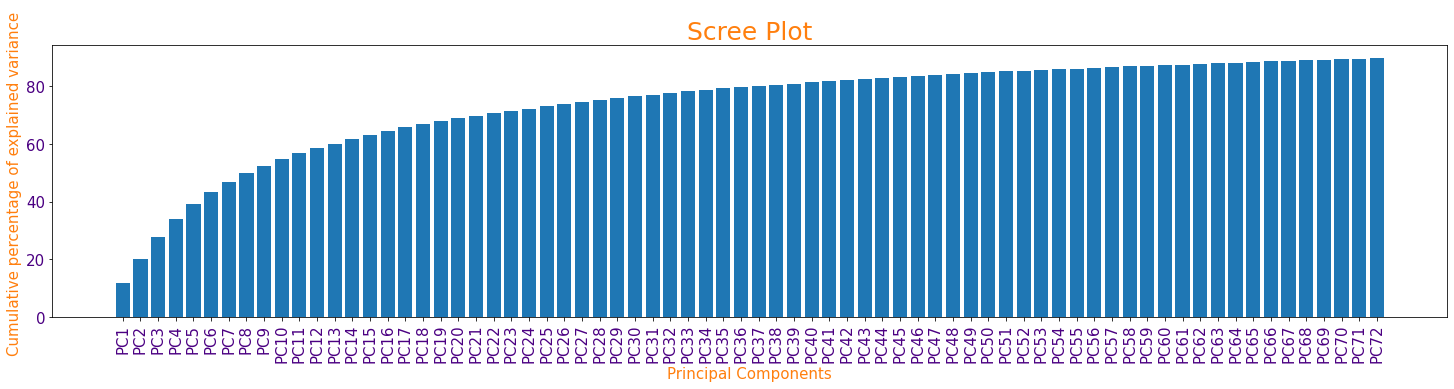

In [77]:
# generate the scree plot
plt.figure(figsize=(25,5))
plt.bar(x=range(1, len(pca_train_X_variation_72)+1), height=pca_train_X_variation_72,tick_label=labels)
plt.xticks(rotation=90, color='indigo', size=15)
plt.yticks(rotation=0, color='indigo', size=15)
plt.title('Scree Plot',color='tab:orange', fontsize=25)
plt.xlabel('Principal Components', {'color': 'tab:orange', 'fontsize':15})
plt.ylabel('Cumulative percentage of explained variance ', {'color': 'tab:orange', 'fontsize':15})

Above scree plot shows that considering first 72 principal components should be sufficient to represent the train_X dataset

In [78]:
# Draw the 2D PCA plot by considering only PC1 and PC2
# PCA plot is to visualize how the data is spread across the origin with new coordinates, based on the loading scores and scaling.

In [79]:
pca_fit_transform_train_X_72_df = pd.DataFrame(pca_fit_transform_train_X_72,columns=labels )
# verify the first 2 rows of data with new coordinates
pca_fit_transform_train_X_72_df.head(2)

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  0.853536 -1.231429  2.028732  0.888240  1.620308 -0.067266  0.555435   
1 -0.106862 -1.300605 -0.024610 -0.782815  0.269748  0.147612  1.091444   

        PC8       PC9      PC10  ...      PC63      PC64      PC65      PC66  \
0 -1.024861  0.203882 -0.278966  ... -0.051361  0.247209 -0.234313  0.400042   
1 -0.730456 -0.029104  0.586985  ... -0.224471  0.049804  0.101666 -0.257177   

       PC67      PC68      PC69      PC70      PC71      PC72  
0  0.705531  0.657815 -0.742772 -0.389332 -0.474995 -0.088365  
1  0.273141  0.216003 -0.041771 -0.407626  0.159789  0.098459  

[2 rows x 72 columns]

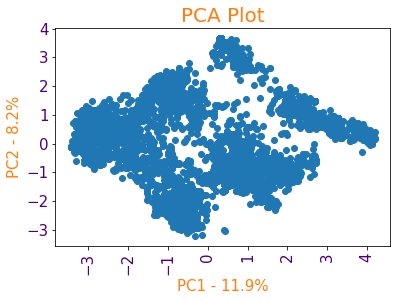

In [80]:
# Draw the 2D PCA plot for PC1 and PC2

pca_train_X_variation_72_Nocumsum = np.round(pca_fit_train_X_72.explained_variance_ratio_*100,decimals=1)
plt.title('PCA Plot',color='tab:orange', fontsize=20)
plt.scatter(pca_fit_transform_train_X_72_df.PC1, pca_fit_transform_train_X_72_df.PC2)
plt.xticks(rotation=90, color='indigo', size=15)
plt.yticks(rotation=0, color='indigo', size=15)
plt.xlabel('PC1 - {0}%'.format(pca_train_X_variation_72_Nocumsum[0]), {'color': 'tab:orange', 'fontsize':15});
plt.ylabel('PC2 - {0}%'.format(pca_train_X_variation_72_Nocumsum[1]), {'color': 'tab:orange', 'fontsize':15});

Above PCA plot shows that how the data is spread along X-axis(PC1) and Y-axis (PC2).
11.9% variance of the data is explained by PC1 and 8.2 % of data is explained by PC2

In [81]:
# From PCA, the final train and test datasets are as follows

#train data
pca_fit_transform_train_X_72.shape

(4209, 72)

In [82]:
#test data
pca_transform_test_X_72.shape

(4209, 72)

In [83]:
#train label
train_y.shape

(4209,)

In [84]:
# train ID
train_ID.shape

(4209,)

In [85]:
test_ID.shape

(4209,)

### Task5: Predict test_df values using XGBoost.

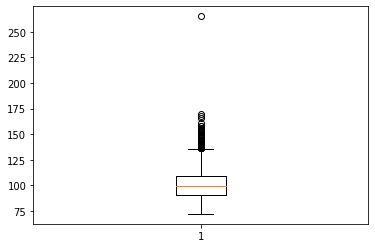

In [86]:
# Before predicting the test values, lets check the target variable train_y for any outliers
# If present, the value will be replaced with median values
# Using boxplot to identify the outliers
plt.boxplot(train_y);

Comments: Outliers are observed in the target variable train_y

In [87]:
# Replacing the outliers with median
# Print the 50th percentile value which is the median
print(train_y.quantile(0.50))

99.15


In [88]:
# Print the 95th percentile value 
print(train_y.quantile(0.95))

120.80600000000001


In [89]:
# Replace the outlier with median values
train_y = np.where(train_y > 120.80600000000001, 99.15, train_y)

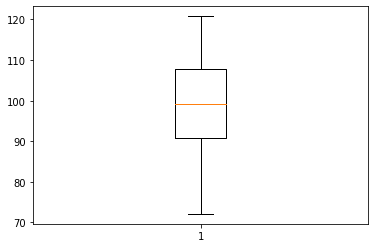

In [90]:
# Verify again with box_plot after replacing the outliers with median values
plt.boxplot(train_y);

It is evident from the box plot that outliers are replaced with median values in the target variable train_y

In [91]:
# import the required libraries
import xgboost as xgb
from sklearn.model_selection import cross_val_score,cross_val_predict
from xgboost import XGBRegressor

In [92]:
# We will use the evaluation metric R2 for regression
# R2 is also known as Coefficient of Determination
# It gives the percentage variation in 'y' (test time) explained by 'X'variables
# or,it gives the percentage of data points that fall within the regression line

In [93]:
# print the XGBoost parameters
print(XGBRegressor())

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             objective='reg:squarederror', random_state=None, reg_alpha=None,
             reg_lambda=None, scale_pos_weight=None, subsample=None,
             tree_method=None, validate_parameters=False, verbosity=None)


In [94]:
# Instantiate the Regressor
xgb_reg = xgb.XGBRegressor()

In [95]:
params={ 'learning_rate'   : [0.01,0.05,0.1,1] ,
         'max_depth'       : [2,3,5,10],
         'min_child_weight': [ 0, 1, 3],
         'n_estimators'    : [100,150,200,500],
         'gamma'           : [1e-2,1e-3,0,0.1,0.01,0.5,1],
         'colsample_bytree': [0.1,0.5,0.7,1],
         'subsample'       : [0.2,0.3,0.5,1],
         'reg_lambda'      : [0,1,10],
         'reg_alpha'       : [1e-5,1e-3,1e-1,1,1e1] 
        }

In [96]:
# Optimize the Hyperparameter using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [97]:
# Using Random search of parameters with 10 fold cross validation
# Improve the predictions using cross validation to optimize the parameters
Random_Search=RandomizedSearchCV (xgb_reg,params,cv=10, scoring='r2', return_train_score=True, n_jobs=-1,verbose=1)

In [98]:
# Fit the training set to the Randon_Search to obtain the best estimators and parameters.
Random_Search.fit(pca_fit_transform_train_X_72,train_y)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   42.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.3min finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n...
                   param_distributions={'colsample_bytree': [0.1, 0.5, 0.7, 1],
                                        'gamma': [0.01, 0.001, 0, 0.1, 0.01,
                                 

In [99]:
# Print the best estimator
Random_Search.best_estimator_

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0.5, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.05, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=150, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=10.0,
             reg_lambda=0, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [100]:
#Print the best parameters
Random_Search.best_params_

{'subsample': 1,
 'reg_lambda': 0,
 'reg_alpha': 10.0,
 'n_estimators': 150,
 'min_child_weight': 1,
 'max_depth': 5,
 'learning_rate': 0.05,
 'gamma': 0.5,
 'colsample_bytree': 0.5}

In [101]:
# Instantiate the XGBoost classifier with the best estimators and parameters
xgb_reg=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0.01, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=3, missing=None, monotone_constraints='()',
             n_estimators=500, n_jobs=2, num_parallel_tree=1, random_state=0,
             reg_alpha=0.1, reg_lambda=10, scale_pos_weight=1, subsample=0.5,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [102]:
r2_Score = cross_val_score(xgb_reg,pca_fit_transform_train_X_72,train_y,scoring='r2',cv=10)
r2_Score

[01:52:34] WARNING: /workspace/src/learner.cc:328: 
Parameters: { importance_type, missing, n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[01:52:35] WARNING: /workspace/src/learner.cc:328: 
Parameters: { importance_type, missing, n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[01:52:37] WARNING: /workspace/src/learner.cc:328: 
Parameters: { importance_type, missing, n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters a

array([0.66832678, 0.63459569, 0.53590043, 0.65388274, 0.63495218,
       0.57858691, 0.51950191, 0.65103458, 0.642009  , 0.67514459])

In [103]:
# Print the mean r2_score
print('r2_score of the model with cross validation is:',round(r2_Score.mean(),2))

r2_score of the model with cross validation is: 0.62


The r2_score with cross validation is: 0.62 or 62 %. This means the model explains 62% variability of the target variable (y) around its mean. Hence, its good to proceed with the prediction of time the car takes to pass testing using test data.

In [104]:
# Fit the training data
xgb_reg.fit(pca_fit_transform_train_X_72,train_y)

[01:53:03] WARNING: /workspace/src/learner.cc:328: 
Parameters: { importance_type, missing, n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0.01, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=3, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=2, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0.1,
             reg_lambda=10, scale_pos_weight=1, subsample=0.5,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [105]:
# predict the time taken by car to pass testing using test dataset
X_test_pred = xgb_reg.predict(pca_transform_test_X_72)
X_test_pred 

array([ 79.838715,  91.62419 ,  76.22654 , ...,  94.467026, 107.03553 ,
        92.00016 ], dtype=float32)

In [106]:
# print the predicted value (time) in the form of table
df_test_pred = pd.DataFrame({'ID': test_ID, 'y': X_test_pred})
# Print the first 10 predicted values
df_test_pred.head(10)

ID           y
0   1   79.838715
1   2   91.624191
2   3   76.226540
3   4   78.483864
4   5  106.575027
5   8   92.746613
6  10  108.134926
7  11   92.048271
8  12  106.781471
9  14   95.480835

In [107]:
# save the predicted time values 
df_test_pred.to_csv('predictedTimeValues.csv', index=False)

#### Conclusion
For a given dataset, XGBoost Regressor algorithm with cross validation results in R2 score of 0.62.

## End of project